# Creating a spycon test

In this notebook we demonstrate, how a test can be created, and immediately used for benchmarking. For simplicity, we reconstruct the same test, that is already in the `data` folder. Let's load all the information, we need for a connectivity test. That means the

1. Spike train data (spike times & unit ids)
2. Set of units, that have been recorded
3. An array with three columns (`pre unit id`, `post unit id`, `conn value`). A row is one connection.

As conn value `0` means no synapse, otherwise it is a synapse. If it is `nan` for a connection pair is not indicated at all, it is assumed to be unknown and not considered for the metric computation.

In [1]:
import numpy
from matplotlib import pyplot 

data = numpy.load('../data/gt_data/sim1917Cell1Block1_tiny.npz')
times, ids = data['times'], data['ids']
nodes = data['nodes']
marked_edges = data['marked_edges']

Now we have loaded all our the information we need, and we construct the `ConnectivityTest` object.

In [2]:
from spycon import ConnectivityTest
myconn_test = ConnectivityTest(name='MyTest', times=times, ids=ids, marked_edges=marked_edges, nodes=nodes)

Using cpu device


With the `run_test` method we can simply evaluated a connectivity algorithm on this test, and get sum interesting metrics.

100%|██████████| 380/380 [00:07<00:00, 51.93it/s]


Text(0.5, 1.0, 'Precision-Recall Curve of MyTest')

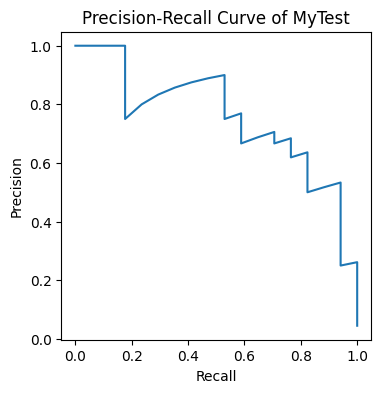

In [3]:
from spycon import coninf
con_method = coninf.Smoothed_CCG()
metrics = myconn_test.run_test(con_method)

pyplot.figure(figsize=(4, 4))
pyplot.plot(metrics['prc_recall'][0], metrics['prc_precision'][0])
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title(f'Precision-Recall Curve of {myconn_test.name}')

Test objects can be saved, and loaded easily.

In [4]:
from spycon import load_test

gt_data_path = '../data/gt_data/'
myconn_test.save(gt_data_path)

reloaded_test = load_test(name='MyTest', path=gt_data_path)
